In [4]:
# Notebook Setup
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import sys
sys.path.append('../../src/utils')
from logger import setup_logger
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

In [7]:
# Initialize logger
logger = setup_logger()

In [8]:
# Load data
DATA_PATH = Path("../../data/raw")
train = pd.read_csv(DATA_PATH / "train.csv", low_memory=False)
store = pd.read_csv(DATA_PATH / "store.csv")
test = pd.read_csv(DATA_PATH / "test.csv")

In [9]:
# Merge store information
train = train.merge(store, on='Store', how='left')
test = test.merge(store, on='Store', how='left')

In [10]:
logger.info("Data loaded successfully")
logger.info(f"Train shape: {train.shape}, Test shape: {test.shape}")

2025-03-11 10:43:40,012 - INFO - Data loaded successfully
2025-03-11 10:43:40,015 - INFO - Train shape: (1017209, 18), Test shape: (41088, 17)


In [11]:
# Display sample data
display(train.head())
display(store.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


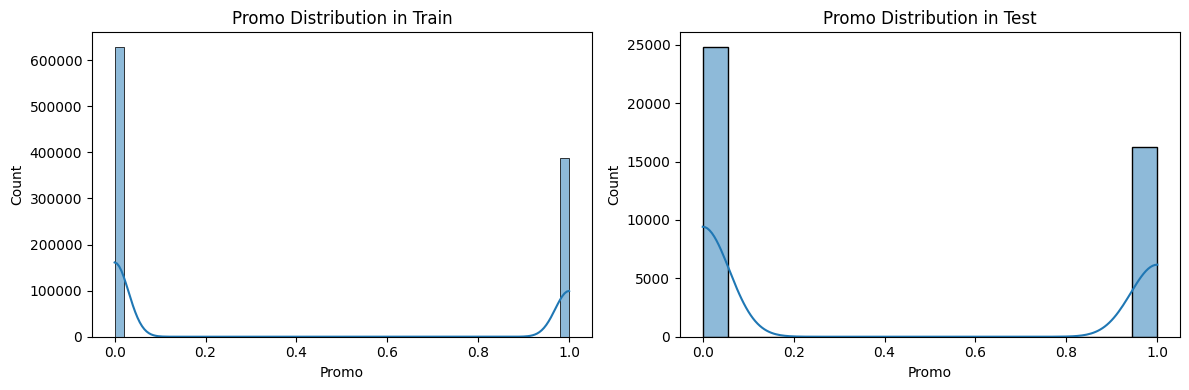

In [12]:
# 1. Check Promotion Distribution
try:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(train['Promo'], kde=True, ax=ax[0])
    ax[0].set_title('Promo Distribution in Train')
    
    sns.histplot(test['Promo'], kde=True, ax=ax[1])
    ax[1].set_title('Promo Distribution in Test')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    logger.error(f"Error in promotion analysis: {str(e)}")

In [13]:
# 2. Holiday Sales Analysis
try:
    # Create holiday flags
    train['HolidayFlag'] = np.where(
        (train['StateHoliday'] != '0') | 
        (train['SchoolHoliday'] == 1), 1, 0
    )
    
    # Calculate sales before/during/after holidays
    holiday_sales = train.groupby('HolidayFlag')['Sales'].mean().reset_index()
    holiday_sales['Period'] = ['Non-Holiday', 'Holiday']
    
    fig = px.bar(holiday_sales, x='Period', y='Sales', 
                 title='Average Sales During Holidays vs Non-Holidays')
    fig.show()

except Exception as e:
    logger.error(f"Holiday analysis error: {str(e)}")

2025-03-11 10:47:41,969 - ERROR - Holiday analysis error: Mime type rendering requires nbformat>=4.2.0 but it is not installed
